In [1]:
#First we import our packages

#Data manipulation
import pandas as pd 

#Data visualization library
import matplotlib.pyplot as plt 

#Data visualization library
import seaborn as sns 

#Scientific computing
import numpy as np

#Use plotting style of 538
plt.style.use('fivethirtyeight') 

#make your plot outputs appear and be stored within the notebook.
%matplotlib inline  

#Create a new figure, or activate an existing figure.
from matplotlib.pyplot import figure 

In [2]:
#Import data from GitHub and view our training data  

titanic_train_url = 'https://raw.githubusercontent.com/exploratorydata/Cleaning_Datasets_Python/main/titanic_train.csv'
train_data = pd.read_csv(titanic_train_url)

#Create a copy of data
train_data_copy1 =train_data

#View dataset
train_data_copy1

#Survived 0 = No, 1 = Yes
#Pclass is socio-economic status (1 =upper, 2=middle, 3=lower)
#Parch = Family relation (parent = mother/father, child = son/daughter)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


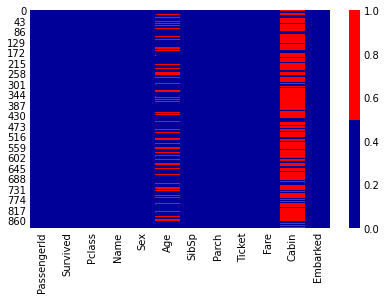

In [3]:
#Creating visualizations to better visualize NaN values


# specify the colors first - red is missing. blue is not missing.
colors = ['#000099', '#FF0000'] 


# create heatmap visualization
sns.heatmap(train_data_copy1.isnull() , cmap=sns.color_palette(colors))

In [5]:
#Calculation to find percentage of NaN values per column
train_data_copy1.isnull().mean() * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Embarked        0.224467
dtype: float64

In [4]:
#We see 77% of total data in Cabin column has NaN values present. 
#Too many NaN values are present so we drop Cabin column

train_data_copy1 = train_data_copy1.drop(columns='Cabin')

In [6]:
#Transform gender column to numerical column named Gender
def sex_to_num(train_data_copy1=train_data_copy1):
    train_data_copy1['Gender'] = train_data_copy1['Sex'].map ( {'female': 0, 
                                    'male': 1} ).astype(int)
sex_to_num()


In [7]:
#Transform Port Embarked column to numerical column named Embarked

def embarked_to_num(train_data_copy1=train_data_copy1):
    train_data_copy1['PortEmbarked'] = train_data_copy1['Embarked'].dropna().map( {'C': 0, 
                                                       'Q': 1, 
                                                       'S': 2} ).astype(int)
embarked_to_num()


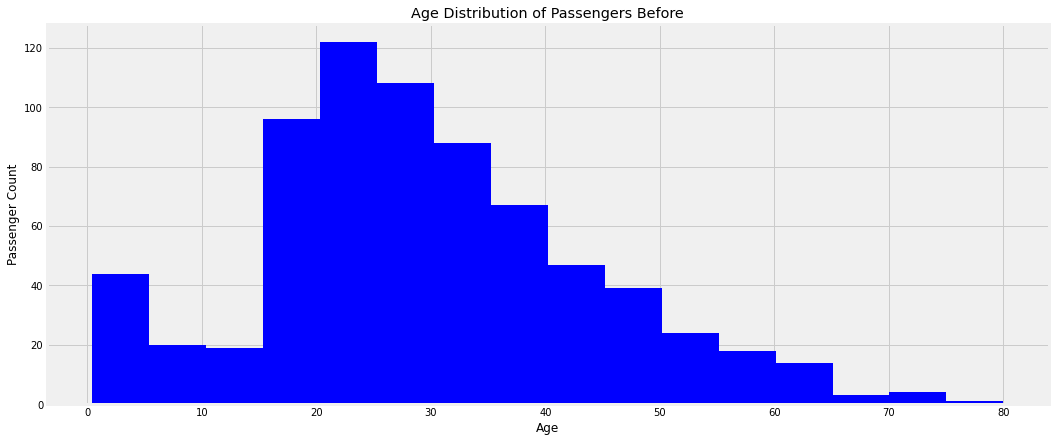

In [10]:
#Create Age Distribution Histogram

train_data_copy1['Age'].hist(bins=16, color='blue' ,figsize=(16,7)) 

plt.title('Age Distribution of Passengers Before')
plt.xlabel('Age')
plt.ylabel('Passenger Count')
plt.grid(True)

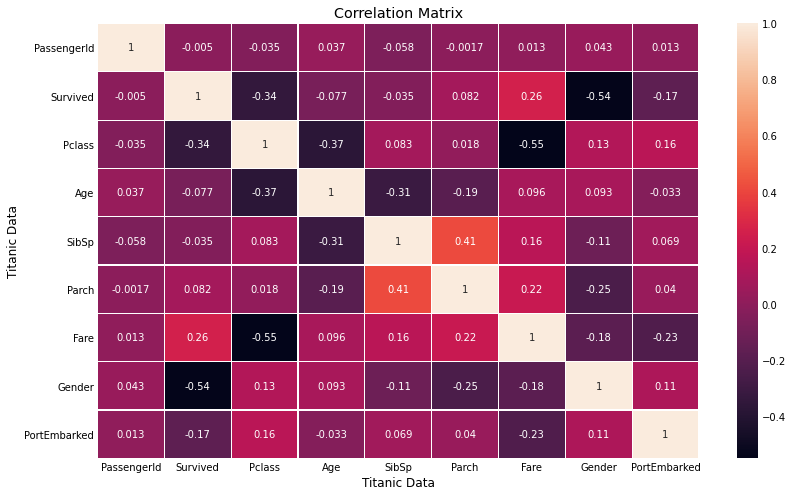

In [ ]:
#Create correlation matrix
correlation = train_data_copy1.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation, linecolor='white',linewidths=0.1, annot=True)
plt.title('Correlation Matrix')
plt.xlabel('Titanic Data')
plt.ylabel('Titanic Data')
plt.show()

In [11]:
#The numpy.zeros() function returns a new array of given shape and type, with zeros.

median_ages = np.zeros((2,3))


In [12]:
# Find median ages for each gender in each passenger class

for i in range(0,2):
    for j in range(0,3):
        median_ages[i,j] = train_data_copy1[ (train_data_copy1['Gender'] == i) & (train_data_copy1['Pclass'] == j+1)]['Age'].dropna().median()
median_ages

array([[35. , 28. , 21.5],
       [40. , 30. , 25. ]])

In [13]:
# Create new column AgeFill to put values into. 
# This retains the state of the original data.
def age_fill(train_data_copy1=train_data_copy1):
    train_data_copy1['AgeFilled'] = train_data_copy1['Age']

    # Put our estimates into NaN rows of new column AgeFill.
    # df.loc is a purely label-location based indexer for selection by label.
    for i in range(0, 2):
        for j in range(0, 3):
            train_data_copy1.loc[ (train_data_copy1.Age.isnull()) & (train_data_copy1.Gender == i) & (train_data_copy1.Pclass == j+1),\
                     'AgeFilled'] = median_ages[i,j]
age_fill()
train_data_copy1['AgeFilled'].head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5    25.0
6    54.0
7     2.0
8    27.0
9    14.0
Name: AgeFilled, dtype: float64

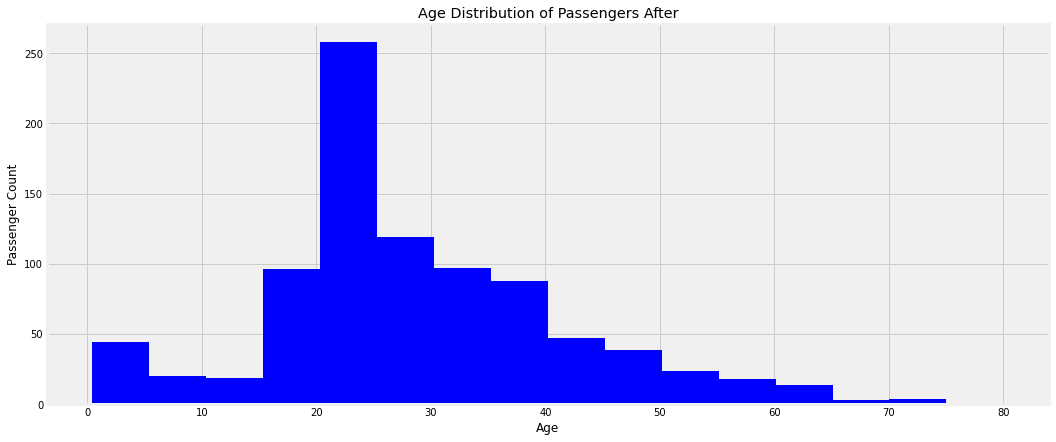

In [15]:
#Create Age Distribution Histogram

train_data_copy1['AgeFilled'].hist(bins=16, color='blue' ,figsize=(16,7)) 

plt.title('Age Distribution of Passengers After')
plt.xlabel('Age')
plt.ylabel('Passenger Count')
plt.grid(True)

In [ ]:
#Calculation to find percentage of NaN values per column
train_data_copy1.isnull().mean() * 100

PassengerId      0.000000
Survived         0.000000
Pclass           0.000000
Name             0.000000
Sex              0.000000
Age             19.865320
SibSp            0.000000
Parch            0.000000
Ticket           0.000000
Fare             0.000000
Embarked         0.224467
Gender           0.000000
PortEmbarked     0.224467
MedianAge        0.000000
dtype: float64